# Lineer Regresyon

#Data & Import

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/lardof/Machine Learning/community_health.csv')

In [4]:
df

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27
...,...,...,...,...,...,...
995,43,female,group E,273,68,22
996,34,female,group D,247,76,16
997,54,female,group B,310,75,27
998,38,male,group E,64,75,7


In [5]:
## Veri Hakkında

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   gender          1000 non-null   object
 2   race/ethnicity  1000 non-null   object
 3   weight          1000 non-null   int64 
 4   height          1000 non-null   int64 
 5   visits          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [7]:
df.describe()

,age,weight,height,visits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.019000,199.045000,67.300000,19.956000
std,14.839166,52.815077,6.285341,6.455055
min,0.000000,45.000000,46.000000,2.000000
25%,36.000000,165.000000,63.000000,15.000000
50%,45.000000,197.000000,67.000000,20.000000
75%,55.000000,236.000000,72.000000,24.000000
max,89.000000,356.000000,86.000000,40.000000


In [11]:
df.isnull().sum()    #bize boş veri sayısını gösterir

age               0
gender            0
race/ethnicity    0
weight            0
height            0
visits            0
dtype: int64

In [14]:
## Veri Hazırlama
#YAŞ VE HASTANYESİ ZİYARET ARASINDAKİ İLİŞKİ

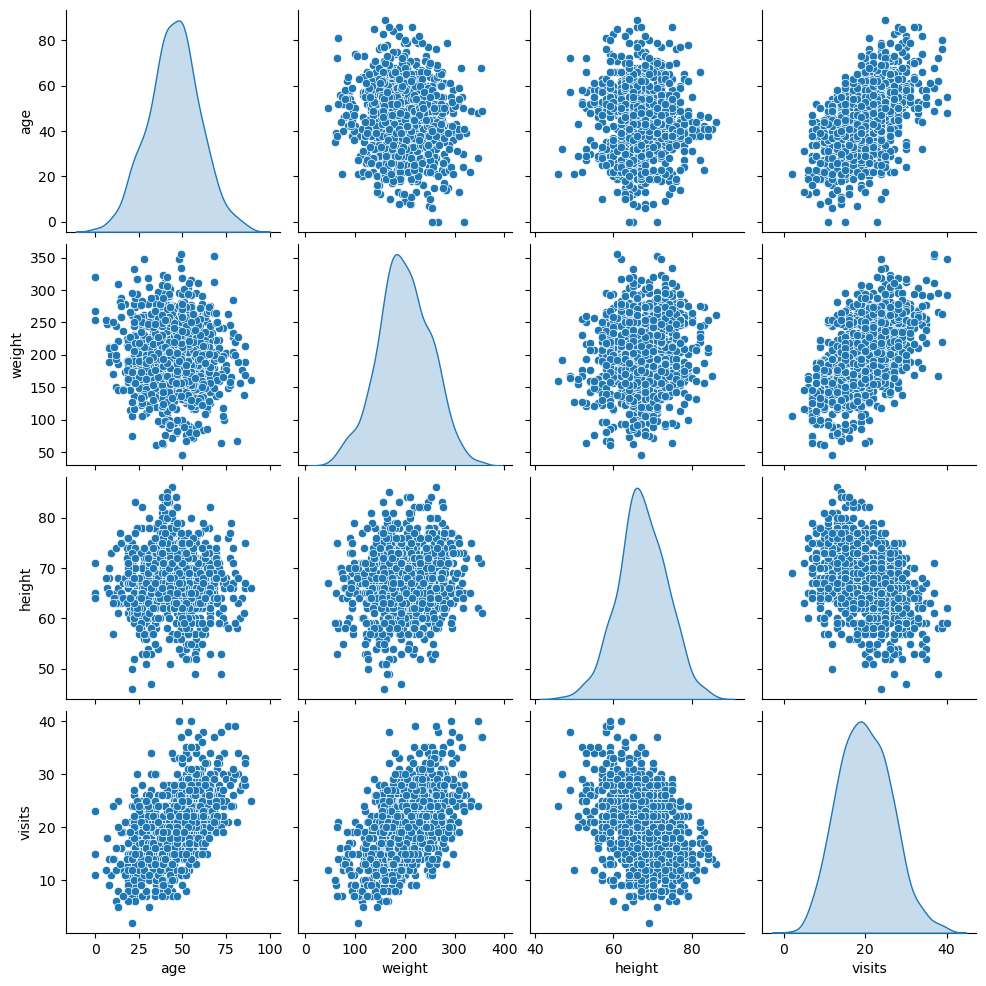

In [19]:
sns.pairplot(df, diag_kind='kde')

In [20]:
# Train Test Split

In [21]:
X = df[['age']]
y = df[['visits']]

In [25]:
X.head()

,age
0,47
1,26
2,26
3,39
4,55


In [26]:
y.head()

,visits
0,28
1,23
2,14
3,21
4,27


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [45]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [52]:
X_train.head()

,age
26,45
155,21
872,47
383,64
648,50


In [53]:
y_train.head()

,visits
26,18
155,8
872,18
383,20
648,24


In [55]:
X_test.head()

,age
890,72
983,47
107,16
609,34
113,50


In [56]:
y_test.head()

,visits
890,25
983,20
107,19
609,16
113,29


# Scikit Learn

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
regr = LinearRegression()

In [61]:
regr.fit(X_train, y_train)

LinearRegression()

In [65]:
df['age'].corr(df['visits'])

0.5395427263086969

In [66]:
##Performans

In [67]:
test_pred = regr.predict(X_test)

In [68]:
test_pred

array([[26.08962087],
       [20.36064139],
       [13.25670684],
       [17.38157206],
       [21.04811893],
       [14.17334356],
       [15.54829863],
       [20.58980057],
       [20.81895975],
       [18.98568632],
       [12.79838848],
       [18.0690496 ],
       [20.36064139],
       [21.50643729],
       [24.25634743],
       [18.98568632],
       [14.63166192],
       [22.65223318],
       [25.17298415],
       [17.83989042],
       [17.38157206],
       [22.19391482],
       [19.90232303],
       [20.36064139],
       [20.81895975],
       [21.04811893],
       [20.58980057],
       [16.23577617],
       [21.50643729],
       [21.73559647],
       [17.83989042],
       [29.29784937],
       [17.83989042],
       [21.73559647],
       [24.71466579],
       [19.44400467],
       [15.08998027],
       [20.36064139],
       [20.36064139],
       [21.50643729],
       [17.15241288],
       [16.69409453],
       [27.23541676],
       [19.90232303],
       [15.54829863],
       [20

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
print('Theta :     ', (regr.coef_,))
print('intercept : ', (regr.intercept_,))
print('R^2 :       ', (r2_score(y_test,test_pred),))
print('MAE :       ', (mean_absolute_error(y_test, test_pred),))
print('RMSE :      ', (np.sqrt(mean_squared_error(y_test,test_pred),)))

Theta :      (array([[0.22915918]]),)
intercept :  (array([9.59015998]),)
R^2 :        (0.2908064834189634,)
MAE :        (4.383435215494492,)
RMSE :       5.573743444959627


In [88]:
df['visits'].mean()

19.956

In [89]:
df['visits'].std()

6.455054742737022

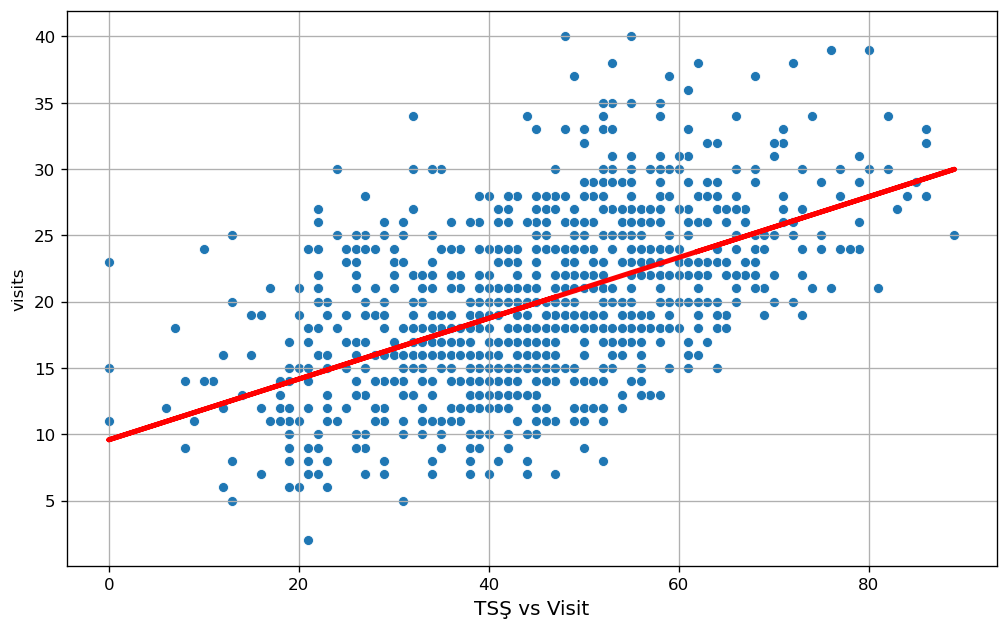

In [96]:
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(X, regr.predict(X), color='red', lw=3)
sns.scatterplot(data=df, x='age', y='visits')

plt.xlabel('Yaş', size=10)
plt.xlabel('Visit', size=10)
plt.xlabel('TSŞ vs Visit', size=12)
plt.grid(True)
plt.show()